In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# rolling 均值滤波

In [ ]:
# 1. 创建一个示例 DataFrame
data = {
    "date": pd.to_datetime(
        [
            "2025-07-01",
            "2025-07-02",
            "2025-07-03",
            "2025-07-04",
            "2025-07-05",
            "2025-07-06",
            "2025-07-07",
            "2025-07-08",
            "2025-07-09",
            "2025-07-10",
            "2025-07-11",
            "2025-07-12",
            "2025-07-13",
            "2025-07-14",
            "2025-07-15",
            "2025-07-16",
            "2025-07-17",
            "2025-07-18",
            "2025-07-19",
            "2025-07-20",
        ]
    ),
    "price": [
        100,
        102,
        105,
        103,
        106,
        110,
        108,
        112,
        115,
        111,
        125,
        118,
        120,
        108,
        110,
        105,
        117,
        107,
        112,
        100,
    ],
}
df = pd.DataFrame(data).set_index("date")

# 2. 计算窗口大小为 5 的均值滤波（滑动平均）
df["mean_filter_5"] = df["price"].rolling(window=5).mean()

# 3. 计算窗口大小为 3 的均值滤波，并将窗口的中心点设为当前值
# center:
#   If False, set the window labels as the right edge of the window index.
#   If True, set the window labels as the center of the window index.
df["mean_filter_3_center"] = df["price"].rolling(window=3, center=True).mean()

# 4. 如果希望窗口内至少有1个值就开始计算
df["mean_filter_5_min_periods_1"] = (
    df["price"].rolling(window=5, min_periods=1).mean()
)

df

,price,mean_filter_5,mean_filter_3_center,mean_filter_5_min_periods_1
date,,,,
2025-07-01,100,NaN,NaN,100.000000
2025-07-02,102,NaN,102.333333,101.000000
2025-07-03,105,NaN,103.333333,102.333333
2025-07-04,103,NaN,104.666667,102.500000
2025-07-05,106,103.2,106.333333,103.200000
2025-07-06,110,105.2,108.000000,105.200000
2025-07-07,108,106.4,110.000000,106.400000
2025-07-08,112,107.8,111.666667,107.800000
2025-07-09,115,110.2,112.666667,110.200000


Text(0.5, 1.0, 'Price')

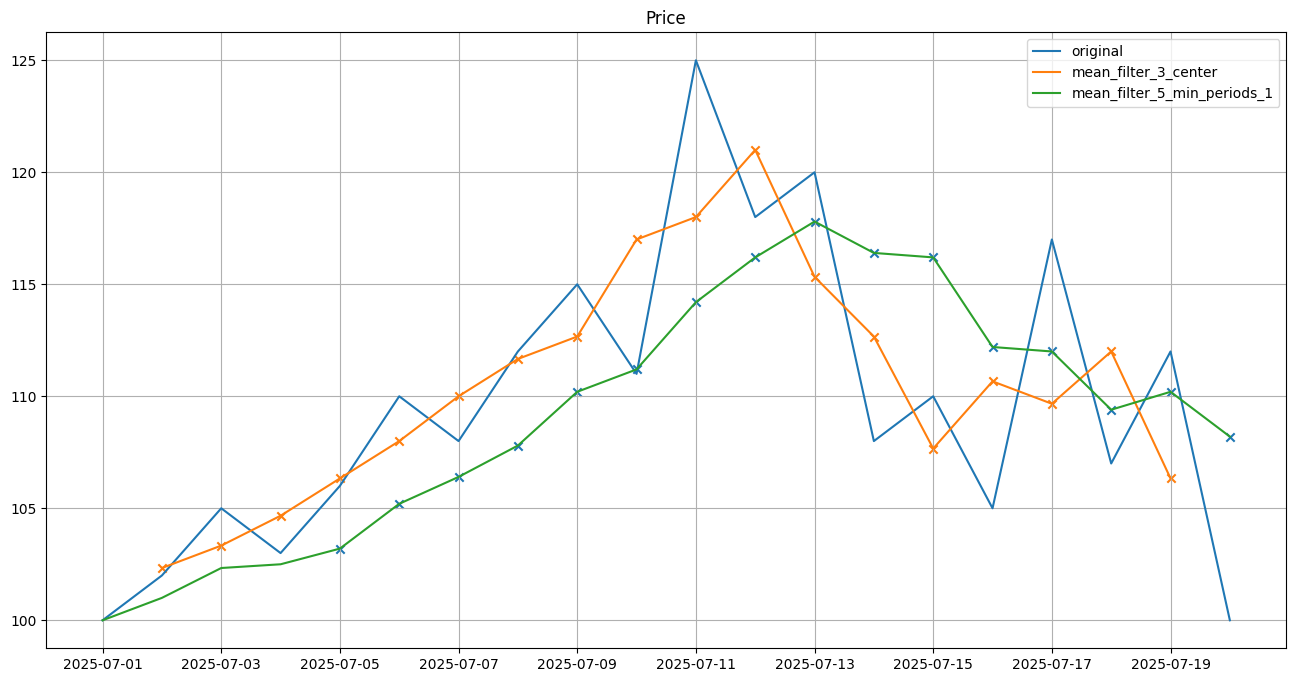

In [14]:
plt.figure(figsize=(16, 8))
x = df.index

y = df["price"]
plt.plot(x, y, label="original")
# plt.scatter(x, y, marker="x")

y = df["mean_filter_5"]
# plt.plot(x, y, label="mean_filter_5")
plt.scatter(x, y, marker="x")

y = df["mean_filter_3_center"]
plt.plot(x, y, label="mean_filter_3_center")
plt.scatter(x, y, marker="x")

y = df["mean_filter_5_min_periods_1"]
plt.plot(x, y, label="mean_filter_5_min_periods_1")
# plt.scatter(x, y, marker="x")

plt.grid()
plt.legend()

plt.title("Price")